In [29]:
import pandas as pd
import urllib.request

data = pd.read_csv('../../news/scraping_result/kr/2019_down4/2019_down4_(KR)Hankyung.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../news/scraping_result/kr/2019_down4/2019_down4_(KR)Tokenpost.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/kr/2019_down4/2019_down4_(KR)BlockMedia.csv', error_bad_lines=False))


In [30]:
data.loc[data['main article']=="Provided by Coinness",'main article'] = data.loc[data['main article']=="Provided by Coinness",'abstract']
data.loc[data['main article']=="Provided by 코인니스",'main article'] = data.loc[data['main article']=="Provided by 코인니스",'abstract']
data.loc[data['main article']=="",'main article'] = data.loc[data['main article']=="",'abstract']
# data.loc[data['main article']=='Provided by 코인니스','abstract']

In [31]:
text = data[['main article']].astype(str)
text['main article'] = text.apply(lambda row: row['main article'].replace("/"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("-"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\xa0",""), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("*"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("…"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\\"," "), axis=1)




In [32]:
from konlpy.tag import Mecab
mecab = Mecab()
text['main token article'] = text.apply(lambda row: mecab.morphs(row['main article']), axis=1)

In [33]:
text['main article']

0     \n\n\n\n\n카일 사마니 멀티코인캐피탈 매니징파트너(사진=김산하 기자)\n\n...
1     \n\n\n\n\n\n\n                        중국 인민은행이...
2     \n\t\t\t\t\t\t\t\t‘15억8000만원(작년 5월)→7억원(12월)→2...
0     20일 파이낸셜뉴스에 따르면 SK증권은 경기침체와 저금리 상황에서 ‘디지털 골드’로...
1     10일(현지시간) 코인텔레그래프에 따르면, 바비 리는 트위터를 통해 "현재 금의 시...
                            ...                        
38    인터넷이 발전하면서 사업의 성패를 결정짓는 핵심 요소로 데이터가 부각되기 시작했다....
39    12일(현지시간) 페이스북은 페이스북 뉴스룸을 통해 페이스북 페이를 런칭했다고 밝혔...
40    짠 빈 투옌 호치민시 인민위원회 부위원장은 전날 사이공 하이테크파크(SHTP)에서 ...
41    양사는 이번 파트너십을 통해 각 사가 보유한 블록체인 기능 및 서비스의 강점을 바탕...
42                                                  nan
Name: main article, Length: 121, dtype: object

In [34]:
# 소문자 적용 , - 문자 삭제
text['main token article'] = text['main token article'].apply(lambda x : [word.replace("-","") for word in x])
# 공백문자 삭제
text['main token article'] = text['main token article'].apply(lambda x : [word for word in x if word])

In [35]:
text['pos tag'] = text.apply(lambda row: mecab.pos(row['main article']), axis=1)

In [36]:
text['pos tag']

0     [(카일, NNP), (사마니, NNP), (멀티, NNG), (코인, NNG), ...
1     [(중국, NNP), (인민, NNG), (은행, NNG), (이, JKS), (세...
2     [(‘, SY), (15, SN), (억, NR), (8000, SN), (만, N...
0     [(20, SN), (일, NNBC), (파이낸셜, NNP), (뉴스, NNG), ...
1     [(10, SN), (일, NNBC), ((, SSO), (현지, NNG), (시간...
                            ...                        
38    [(인터넷, NNG), (이, JKS), (발전, NNG), (하, XSV), (면...
39    [(12, SN), (일, NNBC), ((, SSO), (현지, NNG), (시간...
40    [(짠, MAG), (빈, VV+ETM), (투, NNB), (옌, NNP), (호...
41    [(양사, NNG), (는, JX), (이번, NNG), (파트너십, NNP), (...
42                                          [(nan, SL)]
Name: pos tag, Length: 121, dtype: object

In [37]:
# 불용어 품사 제거
text['main article'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('JKS','JX','JKO','JKB','EC','EP','SN','EP+EC','VV+ETM')])

In [38]:
text['main article']

0     [카일, 사마니, 멀티, 코인, 캐피탈, 매니, 징, 파트너, (, 사진, =, 김...
1     [중국, 인민, 은행, 세계, 중앙은행, 중, 처음, 디지털, 공간, 사용, 하, ...
2     [‘, 억, 만, 원, (, 작년, 월, ), →, 억, 원, (, 월, ), →,...
0     [일, 파이낸셜, 뉴스, 따르, SK, 증권, 경기, 침체, 와, 저금리, 상황, ...
1     [일, (, 현지, 시간, ), 코인, 텔레, 그래프, 따르, ,, 바비, 리, 트...
                            ...                        
38    [인터넷, 발전, 하, 사업, 의, 성패, 결정짓, 는, 핵심, 요소, 데이터, 부...
39    [일, (, 현지, 시간, ), 페이스북, 페이스북, 뉴스룸, 통해, 페이스북, 페...
40    [짠, 투, 옌, 호치민, 시, 인민, 위원회, 부위원장, 전날, 사이공, 하이테크...
41    [양사, 이번, 파트너십, 통해, 각, 사, 보유, 한, 블록체인, 기능, 및, 서...
42                                                [nan]
Name: main article, Length: 121, dtype: object

In [39]:
import csv
stopword_list =[]
f = open('../../stopword/stop_ko.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in stopword_list])

In [40]:
tokenized_doc = text['main article'].apply(lambda x: [word for word in x if len(word) > 1])
print(tokenized_doc)
#tokenized_doc = text['main article']
#tokenized_doc

0     [카일, 사마니, 멀티, 코인, 캐피탈, 매니, 파트너, 사진, 김산하, 백트, B...
1     [중국, 인민, 은행, 세계, 중앙은행, 처음, 디지털, 공간, 사용, 화폐, 예정...
2     [작년, 지난해, 정부, 몰수, 비트코인, 가치, 변화, 지난해, 비트코인, 가치,...
0     [파이낸셜, 뉴스, SK, 증권, 경기, 침체, 저금리, 상황, 디지털, 골드, 촉...
1     [현지, 시간, 코인, 텔레, 그래프, 바비, 트위터, 통해, 현재, 시가총액, 달...
                            ...                        
38    [인터넷, 발전, 사업, 성패, 결정짓, 핵심, 요소, 데이터, 부각, 시작, 페이...
39    [현지, 시간, 페이스북, 페이스북, 뉴스룸, 통해, 페이스북, 페이, 칭했, 밝혔...
40    [호치민, 인민, 위원회, 부위원장, 전날, 사이공, 하이테크, 파크, SHTP, ...
41    [양사, 이번, 파트너십, 통해, 보유, 블록체인, 기능, 서비스, 강점, 바탕, ...
42                                                [nan]
Name: main article, Length: 121, dtype: object


In [41]:
article_contents = tokenized_doc.values.tolist()

In [42]:
len(tokenized_doc)

121

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [44]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [45]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [46]:
# article_contents_tfidf

In [47]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [48]:
word2id = defaultdict(lambda: 0)

In [49]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [50]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [51]:
len(tf_idf_result)

3468

In [52]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

3468


In [53]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [54]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.001*"선별" + 0.001*"원천" + 0.001*"이노베이션" + 0.001*"알려져" + 0.001*"폐쇄" + 0.001*"지표" + 0.001*"Goguen" + 0.001*"영광"')
(1, '0.001*"맞춰" + 0.001*"자라" + 0.001*"준비금" + 0.001*"네요" + 0.001*"설정" + 0.001*"페어팩스" + 0.001*"문자" + 0.001*"이사회"')
(2, '0.001*"강원" + 0.001*"보유자" + 0.001*"해낸다" + 0.001*"완벽" + 0.001*"역동" + 0.001*"OMFIF" + 0.001*"종료" + 0.001*"조만간"')
(3, '0.001*"공룡" + 0.001*"돌아왔" + 0.001*"REP" + 0.001*"체아" + 0.001*"어려움" + 0.001*"식당" + 0.001*"해신" + 0.001*"참가자"')


In [55]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [56]:
sentences = article_contents

In [57]:
length1 = 0
for setence in sentences :
    length1 += len(setence) 
length1

15794

In [58]:
from gensim.models import Word2Vec

In [59]:
model = Word2Vec(sentences, min_count=1)

In [60]:
len(model.wv.vocab)

3468

In [61]:
# model.wv.vocab

In [62]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [63]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/nltk/decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/nltk/lm/counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, defaultdict


In [64]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [65]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [66]:
temp_cluster_result['cluster'] = assigned_clusters

In [67]:
temp_cluster_result['raw_data'] = X.tolist()

In [68]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [69]:
from sklearn.metrics import pairwise_distances

In [70]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [71]:
len(cosine_centroid_list)

3468

In [72]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [73]:
sum(temp_distance[3])

773.263054528003

In [74]:
import scipy.spatial.distance as dist

In [75]:
dist.cosine(X[0],cosine_centroid_list[0])

0.8535534750682202

In [76]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.0314570638688829

In [77]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [78]:
len(tf_idf_value)

3468

In [79]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [80]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1733,"[-0.003780874889343977, 0.0008338433690369129,...",파급,0,"[-0.0006208637, 0.00028492973, -0.00040286907,...",0.526480,0.002637,1.523843,NaN
2924,"[0.0014355486491695046, 0.002353157615289092, ...",Finance,0,"[-0.0006208637, 0.00028492973, -0.00040286907,...",0.550925,0.001318,1.549607,NaN
2187,"[-0.0008564426098018885, 0.0040021431632339954...",볼테르,0,"[-0.0006208637, 0.00028492973, -0.00040286907,...",0.555169,0.001318,1.553851,NaN
3187,"[-0.004474478308111429, -0.0016812350368127227...",습득,0,"[-0.0006208637, 0.00028492973, -0.00040286907,...",0.585965,0.003955,1.582010,NaN
2349,"[-0.004746434278786182, -0.003133529331535101,...",주행,0,"[-0.0006208637, 0.00028492973, -0.00040286907,...",0.583668,0.001318,1.582350,NaN
1728,"[-0.0011957194656133652, -0.001734116463921964...",수도,0,"[-0.0006208637, 0.00028492973, -0.00040286907,...",0.593185,0.002637,1.590548,NaN
999,"[-0.0020638895221054554, 0.0027540235314518213...",토대,0,"[-0.0006208637, 0.00028492973, -0.00040286907,...",0.593268,0.002637,1.590631,NaN
2525,"[0.0019224222050979733, 0.0018096138956025243,...",통인,0,"[-0.0006208637, 0.00028492973, -0.00040286907,...",0.595415,0.001318,1.594097,NaN
2580,"[0.004160839132964611, -0.0034383991733193398,...",BNB,0,"[-0.0006208637, 0.00028492973, -0.00040286907,...",0.599303,0.001318,1.597985,NaN
2506,"[0.0016139965737238526, -0.0012770998291671276...",기조연설,0,"[-0.0006208637, 0.00028492973, -0.00040286907,...",0.604307,0.002637,1.601670,NaN


In [81]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
716,"[-0.00035201877471990883, -0.00230300147086381...",세대,1,"[-0.000323254, 9.883889e-05, -0.000474445, 8.2...",0.551602,0.009229,1.542373,NaN
2384,"[0.001263155834749341, 0.0004047241236548871, ...",특성,1,"[-0.000323254, 9.883889e-05, -0.000474445, 8.2...",0.555530,0.003955,1.551575,NaN
452,"[-0.0027279702480882406, -0.000421773816924542...",일반,1,"[-0.000323254, 9.883889e-05, -0.000474445, 8.2...",0.565199,0.006592,1.558607,NaN
2140,"[-0.0005170975346118212, -0.001029919483698904...",민사,1,"[-0.000323254, 9.883889e-05, -0.000474445, 8.2...",0.560544,0.001318,1.559226,NaN
2370,"[-0.001981258625164628, -0.0033295834437012672...",원래,1,"[-0.000323254, 9.883889e-05, -0.000474445, 8.2...",0.562590,0.001318,1.561271,NaN
1444,"[0.0015565811190754175, -0.0009252227609977126...",단어,1,"[-0.000323254, 9.883889e-05, -0.000474445, 8.2...",0.588508,0.006592,1.581915,NaN
445,"[0.0033892749343067408, -0.0016982890665531158...",확정,1,"[-0.000323254, 9.883889e-05, -0.000474445, 8.2...",0.608431,0.003955,1.604475,NaN
2160,"[-0.00428978493437171, 0.0012639553751796484, ...",커뮤니티,1,"[-0.000323254, 9.883889e-05, -0.000474445, 8.2...",0.608226,0.002637,1.605589,NaN
1225,"[-0.0002679536701180041, -0.001079984242096543...",체포,1,"[-0.000323254, 9.883889e-05, -0.000474445, 8.2...",0.611168,0.003955,1.607212,NaN
2450,"[-0.0027457037940621376, 0.0034124485682696104...",베이직,1,"[-0.000323254, 9.883889e-05, -0.000474445, 8.2...",0.612130,0.002637,1.609493,NaN


In [82]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(30)   # 사회이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
245,"[-0.0008433116017840803, 0.005476386286318302,...",그러,2,"[-0.00031363545, 0.00034461444, 0.00057982275,...",0.501682,0.006592,1.495090,NaN
1793,"[-0.00532951345667243, 1.9280443666502833e-05,...",체계,2,"[-0.00031363545, 0.00034461444, 0.00057982275,...",0.509334,0.006592,1.502742,NaN
3303,"[-0.00010225470032310113, -0.00143618730362504...",취하,2,"[-0.00031363545, 0.00034461444, 0.00057982275,...",0.542114,0.001318,1.540796,NaN
2734,"[0.003655791748315096, 0.0017145787132903934, ...",매력,2,"[-0.00031363545, 0.00034461444, 0.00057982275,...",0.562966,0.005274,1.557693,NaN
1810,"[-0.0021559710148721933, 0.005055198911577463,...",중소,2,"[-0.00031363545, 0.00034461444, 0.00057982275,...",0.594795,0.003955,1.590840,NaN
2238,"[0.0019088378176093102, -0.0014674850972369313...",피니,2,"[-0.00031363545, 0.00034461444, 0.00057982275,...",0.594084,0.002637,1.591447,NaN
3049,"[-0.0016443973872810602, -4.5648306695511565e-...",캠프,2,"[-0.00031363545, 0.00034461444, 0.00057982275,...",0.610226,0.006592,1.603634,NaN
1706,"[0.0017743621720001101, 0.005664689000695944, ...",소시에테,2,"[-0.00031363545, 0.00034461444, 0.00057982275,...",0.609429,0.002637,1.606793,NaN
2001,"[-0.002908318303525448, -0.0001549661392346024...",프로트,2,"[-0.00031363545, 0.00034461444, 0.00057982275,...",0.608427,0.001318,1.607109,NaN
2056,"[-0.005112980026751757, 0.0011495298240333796,...",미비,2,"[-0.00031363545, 0.00034461444, 0.00057982275,...",0.613584,0.002637,1.610947,NaN


In [83]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(30)  # 거래소 돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
56,"[-0.02583196759223938, 0.03284328430891037, -0...",블록체인,3,"[-0.0021176874, 0.0024022318, -0.0009726446, -...",0.006446,0.437724,0.568721,NaN
54,"[-0.015988538041710854, 0.026614900678396225, ...",화폐,3,"[-0.0021176874, 0.0024022318, -0.0009726446, -...",0.011700,0.315109,0.696591,NaN
55,"[-0.02227327600121498, 0.021780947223305702, -...",암호,3,"[-0.0021176874, 0.0024022318, -0.0009726446, -...",0.013585,0.239957,0.773628,NaN
40,"[-0.020620880648493767, 0.0234999842941761, -0...",비트코인,3,"[-0.0021176874, 0.0024022318, -0.0009726446, -...",0.012234,0.220181,0.792054,NaN
3,"[-0.016969075426459312, 0.020520567893981934, ...",코인,3,"[-0.0021176874, 0.0024022318, -0.0009726446, -...",0.014828,0.191175,0.823653,NaN
57,"[-0.014967630617320538, 0.01631747931241989, -...",기술,3,"[-0.0021176874, 0.0024022318, -0.0009726446, -...",0.013261,0.151621,0.861639,NaN
267,"[-0.015511523000895977, 0.01648131012916565, -...",디지털,3,"[-0.0021176874, 0.0024022318, -0.0009726446, -...",0.012719,0.145029,0.867690,NaN
454,"[-0.009951970539987087, 0.016834355890750885, ...",자산,3,"[-0.0021176874, 0.0024022318, -0.0009726446, -...",0.017190,0.139755,0.877435,NaN
42,"[-0.013434773311018944, 0.013998919166624546, ...",거래소,3,"[-0.0021176874, 0.0024022318, -0.0009726446, -...",0.021779,0.141074,0.880705,NaN
458,"[-0.02022767812013626, 0.01695188321173191, -0...",통해,3,"[-0.0021176874, 0.0024022318, -0.0009726446, -...",0.013525,0.127889,0.885635,NaN


In [84]:
y_km = temp_cluster_result['cluster'].values

In [85]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

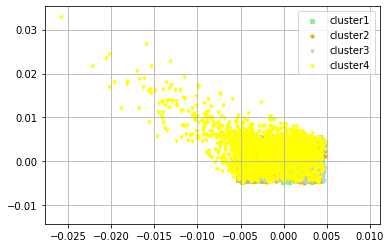

In [86]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [158]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 이슈

564

In [159]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 기타

545

In [160]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 이슈

506

In [161]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 거래소돈

1853

In [122]:
temp_cluster_result['category'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [123]:
temp_cluster_result['label'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [124]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 5 # 이슈

In [125]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 13 #  기타

In [126]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 5 #  이슈

In [127]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 12 # 거래소돈

In [128]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [129]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [130]:
kmeans.inertia_

3.06503775332924

In [131]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[0 0 2 ... 0 0 0]


In [132]:
cluster_values= list(model.wv.vocab)

In [133]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-3.0650377


In [134]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [135]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.088164195


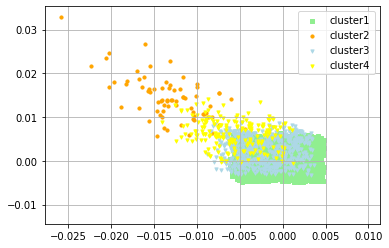

In [136]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [137]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [138]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [139]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [140]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [141]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [142]:
import scipy.spatial.distance as dist

In [143]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [144]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [145]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2277,"[-0.003092376748099923, 0.0027979544829577208,...",btc,0,"[-0.00052030885, 0.0004833141, -0.00026144003,...",0.030927,0.023732,1.007195,NaN
2677,"[0.0001930489088408649, -0.0016079361084848642...",nan,0,"[-0.00052030885, 0.0004833141, -0.00026144003,...",0.030005,0.011866,1.018139,NaN
247,"[-0.0008332175202667713, -0.002354625845327973...",지금,0,"[-0.00052030885, 0.0004833141, -0.00026144003,...",0.028885,0.010548,1.018338,NaN
513,"[-1.2997142221138347e-05, -0.00088044616859406...",애널리스트,0,"[-0.00052030885, 0.0004833141, -0.00026144003,...",0.027999,0.009229,1.018770,NaN
1091,"[0.00025220171664841473, -0.001654133084230125...",입출금,0,"[-0.00052030885, 0.0004833141, -0.00026144003,...",0.030089,0.010548,1.019542,NaN
680,"[-0.00045471335761249065, -0.00228914222680032...",자격,0,"[-0.00052030885, 0.0004833141, -0.00026144003,...",0.027925,0.007911,1.020015,NaN
3139,"[-0.0015724587719887495, -0.000284822861431166...",삭제,0,"[-0.00052030885, 0.0004833141, -0.00026144003,...",0.026910,0.006592,1.020318,NaN
1322,"[-0.0016024672659114003, -0.000362340244464576...",자국,0,"[-0.00052030885, 0.0004833141, -0.00026144003,...",0.024547,0.003955,1.020592,NaN
3369,"[-0.0008673492120578885, 0.002044176682829857,...",니코,0,"[-0.00052030885, 0.0004833141, -0.00026144003,...",0.027206,0.006592,1.020614,NaN
3270,"[-0.003983284812420607, 0.002265441929921508, ...",특구,0,"[-0.00052030885, 0.0004833141, -0.00026144003,...",0.028874,0.007911,1.020964,NaN


In [146]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 거래소 돈 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
56,"[-0.02583196759223938, 0.03284328430891037, -0...",블록체인,1,"[-0.013306541, 0.014452891, -0.0051904703, -0....",0.150283,0.437724,0.712558,NaN
54,"[-0.015988538041710854, 0.026614900678396225, ...",화폐,1,"[-0.013306541, 0.014452891, -0.0051904703, -0....",0.082125,0.315109,0.767016,NaN
55,"[-0.02227327600121498, 0.021780947223305702, -...",암호,1,"[-0.013306541, 0.014452891, -0.0051904703, -0....",0.061403,0.239957,0.821446,NaN
40,"[-0.020620880648493767, 0.0234999842941761, -0...",비트코인,1,"[-0.013306541, 0.014452891, -0.0051904703, -0....",0.061224,0.220181,0.841043,NaN
3,"[-0.016969075426459312, 0.020520567893981934, ...",코인,1,"[-0.013306541, 0.014452891, -0.0051904703, -0....",0.054952,0.191175,0.863777,NaN
42,"[-0.013434773311018944, 0.013998919166624546, ...",거래소,1,"[-0.013306541, 0.014452891, -0.0051904703, -0....",0.030050,0.141074,0.888976,NaN
454,"[-0.009951970539987087, 0.016834355890750885, ...",자산,1,"[-0.013306541, 0.014452891, -0.0051904703, -0....",0.030396,0.139755,0.890640,NaN
267,"[-0.015511523000895977, 0.01648131012916565, -...",디지털,1,"[-0.013306541, 0.014452891, -0.0051904703, -0....",0.046918,0.145029,0.901889,NaN
76,"[-0.009977701120078564, 0.01746048405766487, -...",금융,1,"[-0.013306541, 0.014452891, -0.0051904703, -0....",0.033918,0.130526,0.903392,NaN
74,"[-0.016158049926161766, 0.019065011292696, -0....",거래,1,"[-0.013306541, 0.014452891, -0.0051904703, -0....",0.035071,0.123934,0.911137,NaN


In [147]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2740,"[-0.007750002667307854, -0.0017746564699336886...",blockmedia,2,"[-0.002152086, 0.0024287123, -0.0008775636, -0...",0.036987,0.031643,1.005345,NaN
2794,"[-0.001012430526316166, -0.001697746803984046,...",보이스,2,"[-0.002152086, 0.0024287123, -0.0008775636, -0...",0.032691,0.023732,1.008959,NaN
194,"[0.0009281644597649574, 0.0014092137571424246,...",리스크,2,"[-0.002152086, 0.0024287123, -0.0008775636, -0...",0.024993,0.014503,1.010490,NaN
2795,"[-0.005227424204349518, -0.0014324599178507924...",피싱,2,"[-0.002152086, 0.0024287123, -0.0008775636, -0...",0.034682,0.023732,1.010950,NaN
528,"[-0.008814520202577114, 0.001517508178949356, ...",상승,2,"[-0.002152086, 0.0024287123, -0.0008775636, -0...",0.032568,0.021095,1.011472,NaN
1357,"[0.0001189767281175591, 0.0035262492019683123,...",보험,2,"[-0.002152086, 0.0024287123, -0.0008775636, -0...",0.028833,0.017140,1.011693,NaN
212,"[-0.007915869355201721, 0.008463193662464619, ...",실제,2,"[-0.002152086, 0.0024287123, -0.0008775636, -0...",0.030333,0.018458,1.011875,NaN
659,"[-0.004766392055898905, 0.008972835727036, 0.0...",국내,2,"[-0.002152086, 0.0024287123, -0.0008775636, -0...",0.031462,0.018458,1.013004,NaN
237,"[-0.007709701545536518, 0.0007567137363366783,...",지속,2,"[-0.002152086, 0.0024287123, -0.0008775636, -0...",0.026381,0.013184,1.013197,NaN
142,"[-4.932306183036417e-06, 0.006154470145702362,...",수요,2,"[-0.002152086, 0.0024287123, -0.0008775636, -0...",0.031872,0.018458,1.013414,NaN


In [148]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
547,"[-0.007292796391993761, 0.00548371858894825, 0...",현지,3,"[-0.005707405, 0.0062000416, -0.0023357105, -0...",0.045699,0.056693,0.989006,NaN
546,"[-0.008725360967218876, 0.014173905365169048, ...",emailprotected,3,"[-0.005707405, 0.0062000416, -0.0023357105, -0...",0.045750,0.054056,0.991694,NaN
53,"[-0.0011124140582978725, 0.009583164006471634,...",가상,3,"[-0.005707405, 0.0062000416, -0.0023357105, -0...",0.029306,0.036917,0.992389,NaN
954,"[-0.008733591064810753, 0.011518795043230057, ...",미디어,3,"[-0.005707405, 0.0062000416, -0.0023357105, -0...",0.041577,0.048783,0.992795,NaN
1494,"[-0.009028136730194092, 0.004866454284638166, ...",게임,3,"[-0.005707405, 0.0062000416, -0.0023357105, -0...",0.031078,0.038235,0.992843,NaN
233,"[-0.0021466214675456285, 0.0059171635657548904...",펀드,3,"[-0.005707405, 0.0062000416, -0.0023357105, -0...",0.031389,0.038235,0.993154,NaN
364,"[-0.007273645140230656, 0.010320225730538368, ...",대해,3,"[-0.005707405, 0.0062000416, -0.0023357105, -0...",0.035800,0.042190,0.993609,NaN
666,"[-0.010677319951355457, 0.0062149991281330585,...",고객,3,"[-0.005707405, 0.0062000416, -0.0023357105, -0...",0.037981,0.042190,0.995791,NaN
41,"[-0.0018398099346086383, 0.005591944325715303,...",선물,3,"[-0.005707405, 0.0062000416, -0.0023357105, -0...",0.033438,0.036917,0.996522,NaN
803,"[-0.0100186662748456, 0.010433286428451538, -0...",이용,3,"[-0.005707405, 0.0062000416, -0.0023357105, -0...",0.029933,0.032961,0.996972,NaN


In [162]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #이슈

2651

In [163]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #거래소 돈

72

In [164]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #이슈

557

In [165]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) # 기타

188

In [166]:
temp_cluster_result1['category'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [167]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 5 # 이슈 

In [168]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 12 # 거래소,돈 

In [169]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 5 # 이슈

In [170]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 13 # 기타  

In [171]:
temp_cluster_result1

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#,category,label
0,"[0.0005205511697567999, 0.0043652174063026905,...",카일,0,"[-0.00052030885, 0.0004833141, -0.00026144003,...",0.031610,0.002637,1.028973,NaN,2,5.0
1,"[-0.004059839062392712, 0.00362162827514112, -...",사마니,0,"[-0.00052030885, 0.0004833141, -0.00026144003,...",0.029603,0.005274,1.024329,NaN,2,5.0
2,"[-0.0065001435577869415, -0.001980591099709272...",멀티,2,"[-0.002152086, 0.0024287123, -0.0008775636, -0...",0.029347,0.009229,1.020118,NaN,2,5.0
3,"[-0.016969075426459312, 0.020520567893981934, ...",코인,1,"[-0.013306541, 0.014452891, -0.0051904703, -0....",0.054952,0.191175,0.863777,NaN,2,12.0
4,"[-0.0023204819299280643, 0.0014580392744392157...",캐피탈,2,"[-0.002152086, 0.0024287123, -0.0008775636, -0...",0.027515,0.009229,1.018286,NaN,2,5.0
...,...,...,...,...,...,...,...,...,...,...
3463,"[-0.0007523947861045599, -0.003918581642210483...",DX,0,"[-0.00052030885, 0.0004833141, -0.00026144003,...",0.028069,0.001318,1.026751,NaN,2,5.0
3464,"[-0.0038386916276067495, 0.001768233603797853,...",UX,0,"[-0.00052030885, 0.0004833141, -0.00026144003,...",0.026351,0.001318,1.025032,NaN,2,5.0
3465,"[-0.002513427985832095, 0.0020578622352331877,...",각기,0,"[-0.00052030885, 0.0004833141, -0.00026144003,...",0.028271,0.001318,1.026952,NaN,2,5.0
3466,"[0.0025853770785033703, 0.00038733662222512066...",경계,0,"[-0.00052030885, 0.0004833141, -0.00026144003,...",0.027960,0.001318,1.026641,NaN,2,5.0


In [172]:
temp_cluster_result1['Silhouette'] = 0.088164195
temp_cluster_result['Silhouette'] = 0.088164195

In [173]:
#temp_cluster_result1.to_csv("../cluster/ko_news/2018_down1/ko_news_2018_down1_euclidean.csv")
#temp_cluster_result.to_csv("../cluster/ko_news/2018_down1/ko_news_2018_down1_cosine.csv")

In [174]:
len(temp_cluster_result1)

3468

In [175]:
len(temp_cluster_result)

3468

In [176]:
temp_cluster_result1['result'] = 2
temp_cluster_result['result'] = 2

In [177]:
temp_cluster_result1.to_csv("../cluster/ko_news/2019_down4/ko_news_2019_down4_euclidean.csv")
temp_cluster_result.to_csv("../cluster/ko_news/2019_down4/ko_news_2019_down4_cosine.csv")